<a href="https://colab.research.google.com/github/czarinagluna/Capstone-Proposal/blob/main/vader_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rent the Runway Reviews: Sentiment Analysis
Author: Czarina G Luna

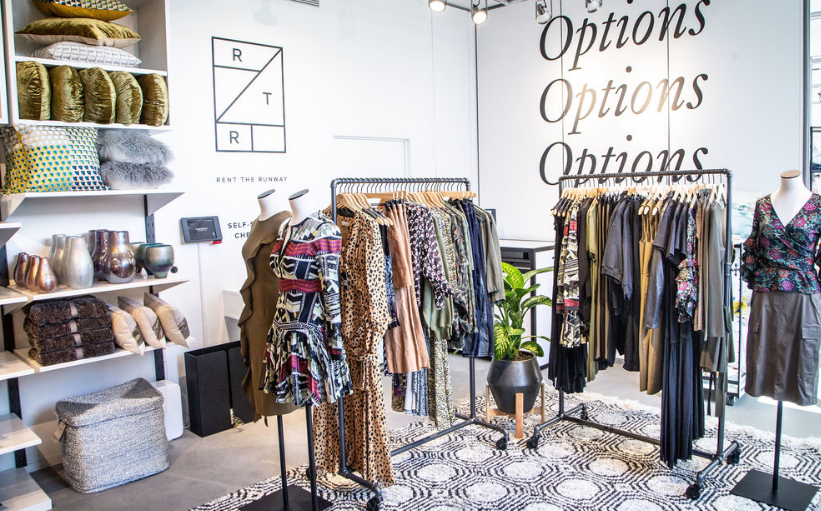

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/data/processed_data.csv')

In [ ]:
df['rating_avg'] = df['rating'].groupby(df['item_id']).transform('mean')


In [ ]:
df['rating_count'] = df['rating'].groupby(df['item_id']).transform('count')


In [ ]:
item_df = df.groupby('item_id')[['category', 'rating_count', 'rating_avg']].first().reset_index()
item_df

,item_id,category,rating_count,rating_avg
0,123373,gown,686,4.400875
1,123793,gown,1714,4.768961
2,124204,dress,795,4.654088
3,124553,dress,493,4.281947
4,125424,dress,466,4.497854
...,...,...,...,...
5845,2963850,skirt,11,4.909091
5846,2964470,top,4,5.000000
5847,2965009,coat,4,4.750000
5848,2965924,jacket,3,4.666667


In [ ]:
item_df['rating_avg'].quantile(0.75)

4.743038493038493

In [ ]:
C = item_df['rating_avg'].mean()
C

4.502653601342901

In [ ]:
m = df['rating_count'].quantile(0.75)
m

234.0

In [ ]:
q_items = item_df.copy().loc[df['rating_count'] >= m]
q_items.shape

(1462, 4)

In [ ]:
item_df.shape

(5850, 4)

In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['rating_count']
    R = x['rating_avg']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
q_items['score'] = q_items.apply(weighted_rating, axis=1)

In [ ]:
q_items = q_items.sort_values('score', ascending=False)

q_items[['item_id', 'rating_count', 'rating_avg', 'score']].head(20)

,item_id,rating_count,rating_avg,score
1,123793,1714,4.768961,4.736972
2351,1260666,154,4.844156,4.638198
2201,1186923,103,4.922330,4.630923
3359,1746190,232,4.758621,4.630088
1830,1010328,122,4.860656,4.625340
2906,1523882,213,4.755869,4.623313
2891,1516843,151,4.794702,4.617197
2888,1515339,161,4.782609,4.616762
3782,1954806,147,4.795918,4.615803
3355,1744232,203,4.743842,4.614693


In [ ]:
df['review'] = df['review_summary'] + ' ' + df['review_text']

In [ ]:
df.head(2)

,fit,user_id,bust_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date,review_month,review_season,rating_avg,rating_count,review
0,fit,420272,34d,2260466,137.0,5.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,68.0,14,28.0,2016-04-20,4,Spring,4.250000,28,So many compliments! An adorable romper! Belt ...
1,fit,273551,34b,153475,132.0,5.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,66.0,12,36.0,2013-06-18,6,Spring,4.554913,519,I felt so glamourous!!! I rented this dress fo...


In [ ]:
# import re

# import nltk
# nltk.download('stopwords')
# stopwords = nltk.corpus.stopwords.words('english')

# from nltk.stem.wordnet import WordNetLemmatizer
# lemmatizer = nltk.stem.WordNetLemmatizer()

# nltk.download('wordnet')

# def preprocess(text):
#   text = text.apply(lambda x: x.lower())
#   text = text.apply(lambda x: re.sub(r'([^A-Za-z0-9|\s|[:punct:]]*)', '', x))
#   text = text.apply(lambda x: x.replace('[^a-zA-Z#]', ' '))
#   text = text.apply(lambda x: ' '.join([i for i in x.split() if len(i)>3]))
#   text = text.apply(lambda x: x.split())
#   text = text.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
#   text = text.apply(lambda x: [word for word in x if word not in stopwords])
#   text = text.apply(lambda x: ' '.join(x))
#   return text

In [ ]:
# df['review'] = df['review'].fillna('')

In [ ]:
# df['review'] = preprocess(df['review'])

In [ ]:
review_df = df[['rating', 'review']].dropna()

In [ ]:
review_df

,rating,review
0,5.0,So many compliments! An adorable romper! Belt ...
1,5.0,I felt so glamourous!!! I rented this dress fo...
2,5.0,It was a great time to celebrate the (almost) ...
3,4.0,Dress arrived on time and in perfect condition...
4,5.0,Was in love with this dress !!! I have always ...
...,...,...
192457,5.0,LOVE IT!!! First Item Im thinking of buying! F...
192458,5.0,LOVE it! The pattern contrast on this dress is...
192459,3.0,"Loud patterning, flattering fit Like the other..."
192460,5.0,loved this dress it was comfortable and photog...


In [ ]:
!pip install -U nltk[twitter] 

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
a = 'This was a good movie.'
sid.polarity_scores(a)

{'compound': 0.4404, 'neg': 0.0, 'neu': 0.508, 'pos': 0.492}

In [ ]:
a = 'This was the best, most awesome movie EVER MADE!!!'
sid.polarity_scores(a)

{'compound': 0.8877, 'neg': 0.0, 'neu': 0.425, 'pos': 0.575}

In [ ]:
blanks = []  # start with an empty list

for i,lb,rv in review_df.itertuples():  
    if type(rv)==str:            
        if rv.isspace():        
            blanks.append(i)     

review_df = review_df.drop(blanks)

In [ ]:
review_df['scores'] = review_df['review'].apply(lambda review: sid.polarity_scores(review))

review_df.head()

,rating,review,scores
0,5.0,So many compliments! An adorable romper! Belt ...,"{'neg': 0.021, 'neu': 0.627, 'pos': 0.352, 'co..."
1,5.0,I felt so glamourous!!! I rented this dress fo...,"{'neg': 0.043, 'neu': 0.644, 'pos': 0.313, 'co..."
2,5.0,It was a great time to celebrate the (almost) ...,"{'neg': 0.0, 'neu': 0.683, 'pos': 0.317, 'comp..."
3,4.0,Dress arrived on time and in perfect condition...,"{'neg': 0.033, 'neu': 0.729, 'pos': 0.237, 'co..."
4,5.0,Was in love with this dress !!! I have always ...,"{'neg': 0.0, 'neu': 0.919, 'pos': 0.081, 'comp..."


In [ ]:
review_df['compound']  = review_df['scores'].apply(lambda score_dict: score_dict['compound'])

review_df.head()

,rating,review,scores,compound
0,5.0,So many compliments! An adorable romper! Belt ...,"{'neg': 0.021, 'neu': 0.627, 'pos': 0.352, 'co...",0.9579
1,5.0,I felt so glamourous!!! I rented this dress fo...,"{'neg': 0.043, 'neu': 0.644, 'pos': 0.313, 'co...",0.9444
2,5.0,It was a great time to celebrate the (almost) ...,"{'neg': 0.0, 'neu': 0.683, 'pos': 0.317, 'comp...",0.9715
3,4.0,Dress arrived on time and in perfect condition...,"{'neg': 0.033, 'neu': 0.729, 'pos': 0.237, 'co...",0.9636
4,5.0,Was in love with this dress !!! I have always ...,"{'neg': 0.0, 'neu': 0.919, 'pos': 0.081, 'comp...",0.8488


In [ ]:
review_df['comp_score'] = review_df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

review_df.head()

,rating,review,scores,compound,comp_score
0,5.0,So many compliments! An adorable romper! Belt ...,"{'neg': 0.021, 'neu': 0.627, 'pos': 0.352, 'co...",0.9579,pos
1,5.0,I felt so glamourous!!! I rented this dress fo...,"{'neg': 0.043, 'neu': 0.644, 'pos': 0.313, 'co...",0.9444,pos
2,5.0,It was a great time to celebrate the (almost) ...,"{'neg': 0.0, 'neu': 0.683, 'pos': 0.317, 'comp...",0.9715,pos
3,4.0,Dress arrived on time and in perfect condition...,"{'neg': 0.033, 'neu': 0.729, 'pos': 0.237, 'co...",0.9636,pos
4,5.0,Was in love with this dress !!! I have always ...,"{'neg': 0.0, 'neu': 0.919, 'pos': 0.081, 'comp...",0.8488,pos


In [ ]:
review_df['comp_score'].value_counts(normalize=True)

pos    0.978166
neg    0.021834
Name: comp_score, dtype: float64

In [ ]:
X = review_df['compound']
y = review_df['rating']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=112221, stratify=y)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [ ]:
import numpy as np
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

In [ ]:
from sklearn.metrics import mean_squared_error
lr.fit(X_train, y_train)
    
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

y_hat_train = lr.predict(X_train)
y_hat_test = lr.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))

print(f'Training R-squared: {train_score}\nTesting R-squared: {test_score} \nTraining RMSE: {train_rmse}\nTesting RMSE: {test_rmse}')

Training R-squared: 0.15080637273595454
Testing R-squared: 0.15088855489186093 
Training RMSE: 0.6579183537699383
Testing RMSE: 0.6578108475932166


In [ ]:
df.head()

,fit,user_id,bust_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date,review_month,review_season,rating_avg,rating_count,review
0,fit,420272,34d,2260466,137.0,5.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,68.0,14,28.0,2016-04-20,4,Spring,4.250000,28,So many compliments! An adorable romper! Belt ...
1,fit,273551,34b,153475,132.0,5.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,66.0,12,36.0,2013-06-18,6,Spring,4.554913,519,I felt so glamourous!!! I rented this dress fo...
2,fit,360448,32c,1063761,130.0,5.0,party,This hugged in all the right places! It was a ...,petite,It was a great time to celebrate the (almost) ...,sheath,64.0,4,32.0,2015-12-14,12,Winter,4.703704,81,It was a great time to celebrate the (almost) ...
3,fit,909926,34c,126335,135.0,4.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,65.0,8,34.0,2014-02-12,2,Winter,4.480054,2231,Dress arrived on time and in perfect condition...
4,fit,151944,34b,616682,145.0,5.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,69.0,12,27.0,2016-09-26,9,Summer,4.710526,114,Was in love with this dress !!! I have always ...


In [ ]:
df['review_date'].min()

'2010-11-03'

In [ ]:
df['review_date'].max()

'2018-01-08'

In [ ]:
df['review_date'].value_counts()

2016-06-15    844
2016-08-09    504
2016-08-10    461
2017-10-10    445
2017-11-07    418
             ... 
2011-11-27      1
2011-09-27      1
2011-11-22      1
2012-01-29      1
2012-02-25      1
Name: review_date, Length: 2270, dtype: int64

In [ ]:
df['review_year'] = pd.DatetimeIndex(df['review_date']).year

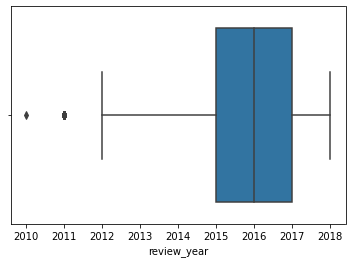

In [ ]:
import seaborn as sns

sns.boxplot(data=df, x='review_year')

In [ ]:
df['review_year'].value_counts()

2017    67871
2016    51361
2015    30596
2014    28269
2013     9617
2012     3302
2018     1255
2011      190
2010        1
Name: review_year, dtype: int64